# Introduction
- Focus: &nbsp; bivariate visualizations - those visualizations involving two variables
- The variation in one variable will affect the value of the other variable
- Visualizations:
    1. heat maps
    2. scatterplots
    3. violin plots
    4. box plots
    5. clustered bar charts
    6. faceting
    7. line plots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Scatter Plots and Correlation
- A **scatter plot** is used to show the relationship between two _quantiative_ variables. The two variables are indicated on the X and Y axis respectively.
- Through scatter plots we can see clearly how these two variables correlate with each other
- To qualify how strong the correlation is between the variables, we use a **correlation coefficient**
- **Pearson correlation coefficient(r)** captures linear relationships. It's value ranging from `-1` to `+1`
- A positive value of `r` indicates an increase in one variable tends to increase another variable. On the other hand a negative `r` means the increase in one variable tends to cause a decrease in another variable.
- A value close to zero indicated a weak correlation and a value close to `-1` and `+1` indicates a strong correlation

## `matplotlib.pyplot.scatter()`
- Scatter plot showing a negative correlation between two variables

In [3]:
fuel_econ = pd.read_csv('data/fuel-econ.csv')
fuel_econ.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


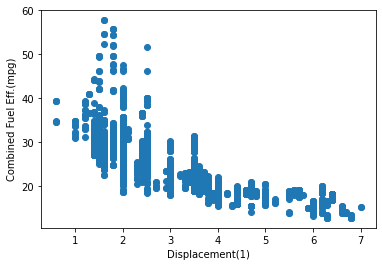

In [4]:
# scatter plot
plt.scatter(data = fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff.(mpg)');

- The relationship between the two variables is negative because as higher values of the x-axis variables are increasing, the values of the variable plotted on the y-axis are decreasing

### Alternative approach - seaborn.regplot()
- Seaborn's [regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html) combines scatterplot creation with regression function fitting.

### Scatter plot showing a negative correlation between two variables

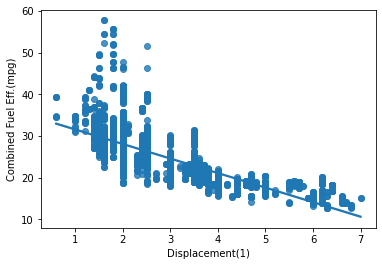

In [5]:
sb.regplot(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement(1)')
plt.ylabel('Combined Fuel Eff.(mpg)');

### Scatter plot showing a positive correlation between two variables

![negative](./data/l4-c02-scatterplot2.png)

- By default the regression line is linear and includes a shaded confidence region for the regression estimate
- In this case, since the trend looks like a \text{log}(y) \propto xlog(y)∝x relationship (that is, linear increases in the value of x are associated with linear increases in the log of y), plotting the regression line on the raw units is not appropriate.
- If we don't care about the regression line, then we could set `fit_reg = False` in the `regplot` function call.

### Plot the regression line on the transformed data

/home/mark/anaconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.YTick at 0x7f5d88043b80>,
 [Text(0, 1.0, '10'),
  Text(0, 1.3010299956639813, '20'),
  Text(0, 1.6989700043360187, '50'),
  Text(0, 2.0, '100')])

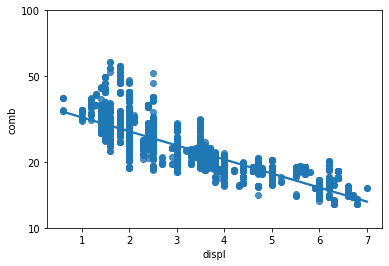

In [6]:
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans));
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs)

# Overplotting, Transparency and Jitter
- If we have a very large number of points to plot or our numeric variables are discreet-valued then it is possible that using a scatterplot straightforwadly will not be informative
- The visualization will suffer from overplotting where the high number of overlap in points makes it difficult to see the actual relationship between the plotted variables

### Jitter - Randomly add/subtract a small value to each data point
- Example for each jitter to move the position for each point slightly from its true value
- Jitter is not a dirtect point in `matplotlib`'s scatter function but is a built in option with seaborn's `regplot` function
- The x and y jitter can be added independently and won't affect the fit of any regression function if made.

In [7]:
fuel_econ.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


<AxesSubplot:xlabel='year', ylabel='comb'>

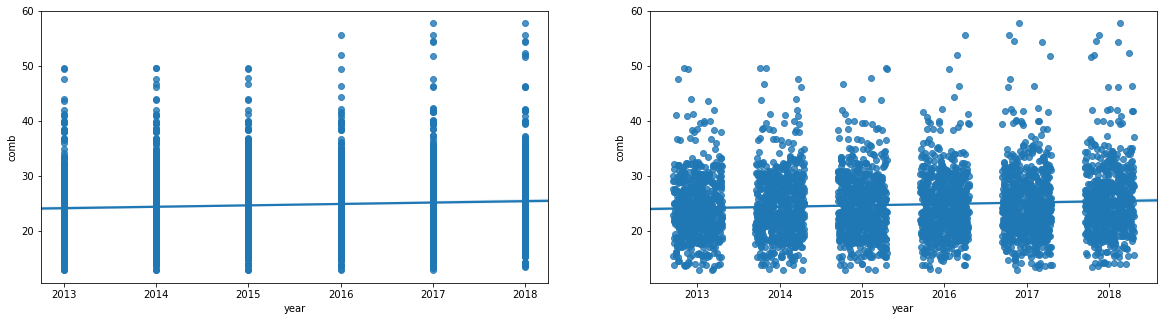

In [8]:
plt.figure(figsize = [20, 5])

# PLOT ON LEFT: SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data=fuel_econ, x='year', y='comb', truncate=False)

# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits.
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sb.regplot(data=fuel_econ, x='year', y='comb', truncate=False, x_jitter=0.3)

- In the left scatter plot above the degree of variability in the data and strength of the relationship is fairly unclear
- In such cases we may want to employ _transpaency_ and _jitter_ to make the scatter plot informative
- The `alpha` parameter adds transparency to `scatter()` and `regplot()` functions

### Plot with both jitter and transparency

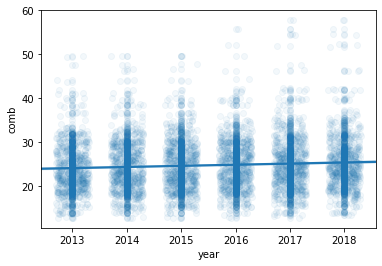

In [9]:
# The scatter_kws helps specifying the opaqueness of the data points.
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque.
sb.regplot(data=fuel_econ, x='year', y='comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha': 1/20})

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data=fuel_econ, x='year', y='comb', alpha=1/20);

- The jitter settings will cause each point to be plotted in a uniform `+.3` range of their true values
- Transparency has been changed to a dictionary assigned to the "scatter_kws" parameter

# Heatmaps
- A **heatmap** is a 2D version of the histogram that can be used as an alternative to the scatterplot
- Like a scatterplot the values of the two numeric variables to be plotted are placed on the plot axes
- Similar to a histogram the plotting area is divided into a grid and the number of points in each grid rectangle is added up.
- Since there wont be room for bar heights counts are indicated instead by grid cell color

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

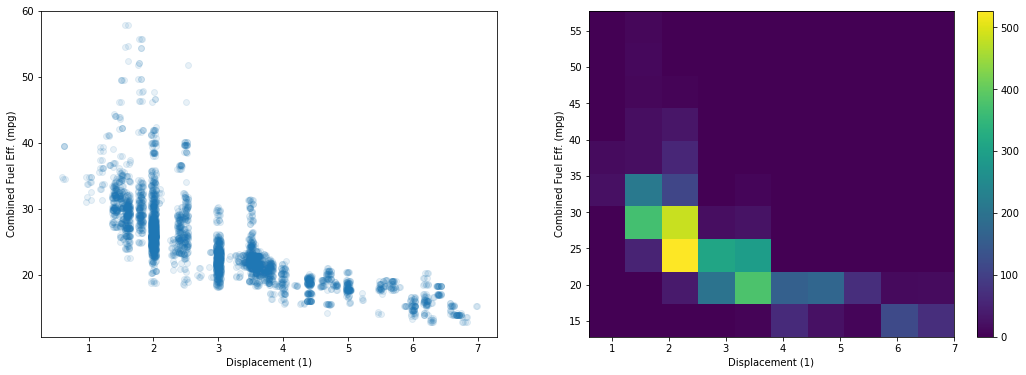

In [10]:
plt.figure(figsize=[18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data=fuel_econ, x='displ', y='comb', x_jitter=0.04, scatter_kws={'alpha': 1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data=fuel_econ, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

- `colorbar()` function call adds a colorbar to the side of the plot, showing the mapping from counts to colors

### Additional Variations
- To select a different color palette you cn=an set the `cmap` parameter in `hist2d`
- The most convenient way to do this is to set the "cmap" value as a string referencing a built-in matplotlib palette
- [A list of valid strings](https://matplotlib.org/stable/api/pyplot_summary.html)
- We would also want to distinguish the cells with zero counts from those with non zero counts.The "cmin" parameter specifeis the minimum value in a cell before it will be plotted
- `cmin=0.5` means that a cell will only get colored if it contains one point

### Heat plot - Set a minimum bound on counts and a reverse color map

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

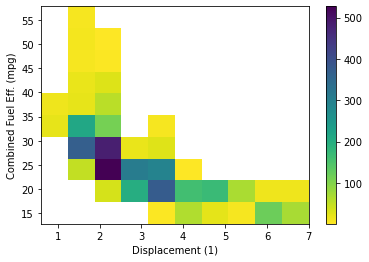

In [11]:
# Use cmin to set a minimum bound of counts
# Use cmap to reverse the color map.
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

- As the count of points in the cell increases, the color in the heatmap gets brighter and moves from blue to yellow

### Heat plot - Specify bin edges

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

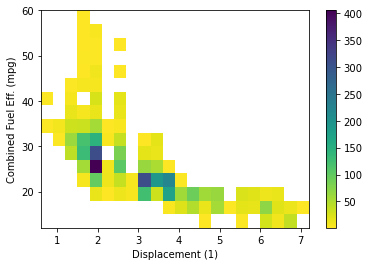

In [12]:
# Specify bin edges
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Notice the areas of high frequency in the middle of the negative trend in the plot.

- The "bins" parameter takes a listof two bin edge specifications, one for each dimension.
- Choosing an appropriate bin size is just as important here as it was for the univariate histogram

### Annotations on each cell
- If you have alot of data you might want to add annotations to cells in the plot indicating the count of points in each cell
- From `hist2d` this requires the addition of text elements one by one, much like how text annotations were added to the bar plots
- We can get the counts to annotate directly directly from what is returned by `hist2d` which includes not just the plotting object but an array of counts and two vectors of bin edges.

### Add text annotation on each cell using pyplot.text() function

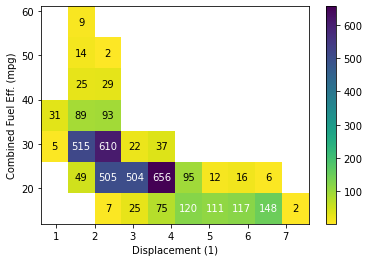

In [13]:
# Specify bin edges
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts
# Use cmap to reverse the color map.
h2d = plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,cmap='viridis_r', bins=[bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Select the bi-dimensional histogram, a 2D array of samples x and y.
# Values in x are histogrammed along the first dimension and
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i, j]
        if c >= 100:  # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c), ha='center', va='center', color='white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c), ha='center', va='center', color='black')


- If you have too many cells in your heatmap then the annotations will end up being too overwhelming, too much to attend to
- In cases like that, its best to leave off the annotations and let the data and colorbar speak for themselves
- You're more likely to see annotations in a categorical heat map where there are going to be fewer cells plotted
- 
- Heat maps can be easier to interpret than scatterplots when there are a large number of overlapping data points.
- As long as there are not too many cells in the heat map, which is the case for categorical heat maps, annotations can be helpful

# Quiz
Look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). Use a scatter plot to depict the data.
* What is the general relationship between these variables?
* Are there any points that appear unusual against these trends?

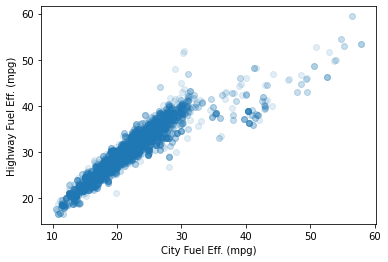

In [14]:
def scatterplot_solution_1():
    # data setup
    fuel_econ = pd.read_csv('./data/fuel-econ.csv')
    plt.scatter(data=fuel_econ, x='city', y='highway', alpha=1/8)
    # plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
    plt.xlabel('City Fuel Eff. (mpg)')
    plt.ylabel('Highway Fuel Eff. (mpg)')


scatterplot_solution_1()

- _Most of the data fall in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Some transparency is added via 'alpha' to show the concentration of data_
- _Interestingly, for most cars highway mileage is clearly higher than city mileage, but for those cars with city mileage above about 30 mpg, the distinction is less pronounced. In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend._

Look at the relationship between two other numeric variables.
- How does the engine size relate to a car's CO2 footprint?
- The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). Use a heat map to depict the data. How strong is this trend?

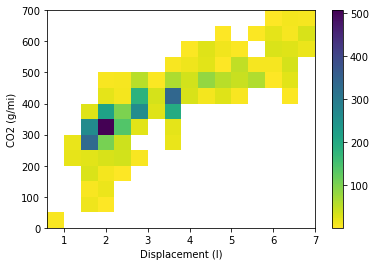

In [15]:
def scatterplot_solution_2():
  # data setup
  fuel_econ = pd.read_csv('./data/fuel-econ.csv')
  bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.4, 0.4)
  bins_y = np.arange(0, fuel_econ['co2'].max()+50, 50)
  plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
  plt.colorbar()
  plt.xlabel('Displacement (l)')
  plt.ylabel('CO2 (g/mi)')

scatterplot_solution_2()


- _In the heat map, I've set up a color map that goes from light to dark and made it so that any cells without count don't get colored in. The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions. The trend is somewhat broken by those cars with the lowest emissions, which still have engine sizes shared by most cars (between 1 and 3 liters)._

### Violin Plots
- There are a few ways of plotting the relationship between one quantitative and one qualitative variable that demonstrate the data at different levels of abstraction
- The violin plot is on the lower level of abstraction
- For each level of the categorical variable, a distribution of the values on the numeric variable is plotted
- We get a curve for each level of the categorical variable whose area depicts the distribution of points, where the curve is wider there are more data points
- Its basically a smooth histogram or density curve turned on its side
- The distribution is plotted as a kernel density estimate, something like a smoothed histogram.

### Violin plot for plotting a Quantitative variable (fuel efficiency) versus Qualitative variable (vehicle class)

In [16]:
fuel_econ.tail(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5
3928,39901,Lexus,LS 500 AWD,2018,Midsize Cars,All-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,18.0431,22.6000,27.0000,39.3000,21.3945,417,4,4


<AxesSubplot:xlabel='VClass', ylabel='comb'>

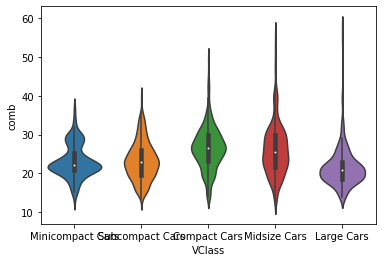

In [17]:
# Types of sedan classes
sedan_classes = ['Minicompact Cars', 'Subcompact Cars' ,'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

sb.violinplot(data=fuel_econ, x='VClass', y='comb')

- Each plot has been rendered in a different color like how the plain `countplot()` was renderd. We can set the color parameter to make each curve the same color if it is not meaningful.
- Inside each curve there is a black shape with a white dot inside, **a miniature box plot**. The box plot can be removed by setting `inner=None` parameter in the `violinplot` call to simplify the look of the final visualization.

### Violin plot without datapoints in the violin interior

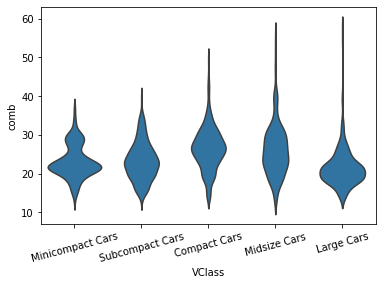

In [18]:
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior.
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot.
sb.violinplot(data=fuel_econ, x='VClass', y='comb',color=base_color, inner=None)
plt.xticks(rotation=15);

### Additional Variations
- Much like how a bar chart can be rendered with horixontal bars, the violin plot canalso be rendered horizontally.
- Seaborn is smart enough to make an appropriate inference on which orientation is requested depending on whether "x" or "y" receives the categorical variable.
- But if both variables are numeric e.g one is discreetly-valued then the other "oreint" parameter can be used to specify the plot orientation.
- Seaborn's [violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html) function can be used to create violin plots

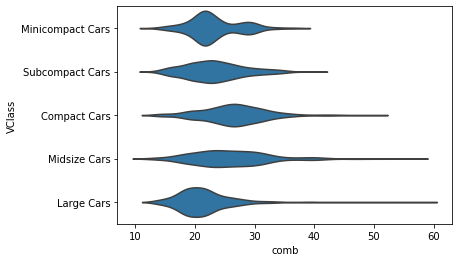

In [19]:
sb.violinplot(data=fuel_econ, y='VClass', x='comb',color=base_color, inner=None);

# Box Plots
- A **[box plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)** can be used to show the relationship between a numeric variable and a categorical variable
- In a box the central lineindicates the median, the upper and lower edges show the first and third quartiles.
- Whiskers outside of the box indicate the largest and smallest values. Box plots alsohave outliers plotted as points.
- Compared to the violin plot a box plot leans more on the summarization of the data, primarily just reportn=ing a set of descriptive statistics for the numeric value on each categorical 

### Violin versus Box Plots

(6.966470319355814, 63.09321945242605)

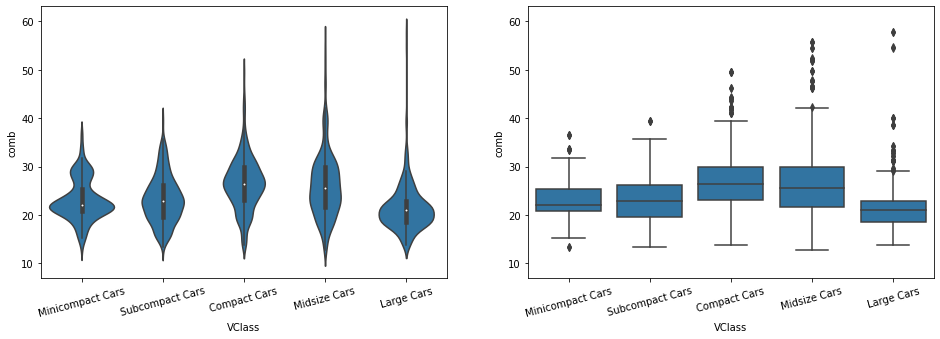

In [20]:
# Step 1. Import packages
# Step 2. Load data
# Step 3. Convert the "VClass" column from a plain object type into an ordered categorical type
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize=[16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim())  # set y-axis limits to be same as left plot

- In order to provide a better comparison of the violin and box plots, a ylim expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by violinplot() is assigned to a variable, ax1 is used to programmatically obtain those limit values.
- **Documentation**: [Axes Objects](https://matplotlib.org/stable/api/axes_api.html)
- The inner boxes and lines in the violin plot match up with the boxes and whiskers in the box plot
-  In a box plot, the central line in the box indicates the median of the distribution, while the top and bottom of the box represent the third and first quartiles of the data, respectively. Thus, the height of the box is the interquartile range (IQR).
- From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. Typically, a maximum range is set on whisker length; by default, this is 1.5 times the IQR.
- For the Gamma level, there are points below the lower whisker that indicate individual outlier points that are more than 1.5 times the IQR below the first quartile.
- In comparison the box plot is a cleaner summary of the data than the violin plot. It;s easier to compare statistics between the groups with a box plot. This makes a box plot worth more consideration if you have a lot of groups to compare, or if you are building explanatory plots
-  You can clearly see from the box plot that the "Large Cars" group has the lowest median. On the other hand, the box plot lacks as nuanced a depiction of distributions as the violin plot: you can't see the slight bimodality present in the "Minicompact Cars" values.
- The violin plot may be a better option for exploration, especially since seaborn's implementation also includes the box plot by default

### Horizontal box plot

<AxesSubplot:xlabel='comb', ylabel='VClass'>

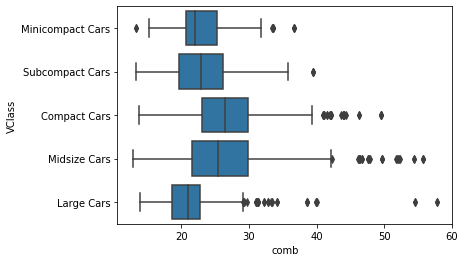

In [21]:
sb.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color)

### Violin plot with quartile information in the middle
- By setting `inner=quartile`, three lines will be plotted within each violin rea for the three middle quartiles. The line with the thick dashes indicates the median and the two lines with shorter dashes on either side indicate the first and third quartiles.

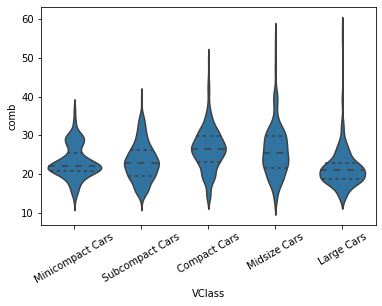

In [22]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb',color=base_color, inner='quartile')
plt.xticks(rotation=30);

## Quiz
- The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: `{Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}`.
- Use a box plot to visualize the relationship between the `mpg` variable and the `vehicle_class` variable.
    1. What is the relationship between the size of a car and the size of its engine? The vehicle classes can be found in the VClass column, while the engine sizes are in the displ column (in liters).

In [23]:
fuel_econ.sample(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
2050,36174,Porsche,911 Targa 4 GTS,2016,Minicompact Cars,4-Wheel Drive,Manual 7-spd,Premium Gasoline,6,3.8,70,0,17.9691,22.5000,25.2823,35.600,20.6581,431,5,5
2656,37381,Ford,Fusion AWD,2017,Midsize Cars,All-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.0,0,103,19.8500,25.0633,28.6881,40.879,23.0448,386,5,5
2038,36158,Ford,Fusion FWD,2016,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.0,0,100,22.3944,28.6000,32.5998,47.100,26.0665,341,6,6
550,33281,Bentley,Continental GTC,2013,Subcompact Cars,All-Wheel Drive,Automatic (S8),Premium Gasoline,12,6.0,86,0,12.0226,14.4000,20.0478,26.700,14.6641,604,3,3
598,33351,Mercedes-Benz,S350 Bluetec 4matic,2013,Large Cars,4-Wheel Drive,Automatic 7-spd,Diesel,6,3.0,0,109,20.8906,26.5000,30.7898,44.200,24.4243,416,6,5


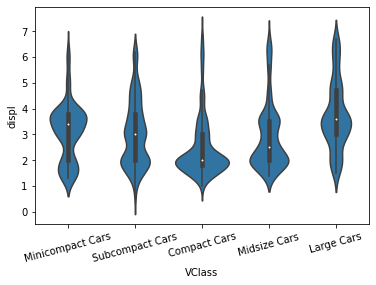

In [24]:
def violinbox_solution_1():
    # data setup
    fuel_econ = pd.read_csv('./data/fuel-econ.csv')
    sedan_classes = ['Minicompact Cars', 'Subcompact Cars','Compact Cars', 'Midsize Cars', 'Large Cars']
    # Note: based on the pandas version, you need to code differently
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21):  # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(
            ordered=True, categories=sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
    else:  # pre-v0.21
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(
            'category', ordered=True, categories=sedan_classes)
    # plotting
    base_color = sb.color_palette()[0]
    sb.violinplot(data=fuel_econ, x='VClass', y='displ',color=base_color)
    plt.xticks(rotation=15)


violinbox_solution_1()

- The relationship between variables is not consistent. Compact cars tend to have smaller engine sizes than mini compact and subcompact cars even though the relationship between tose two vehicle sizes are smaller
- The box plot would make it easier to see that the median displacement for the two smallest vehicle classes is greater than the third quartile of the compact car class.

# Clustered Bar Charts
- **Clustered bar charts** can be used to show the relationship between two qualitative variables
- However to do this we may need to process the second variable a little so that it can show a quantitative value along the y-axis
- You can count the frequency of the second variable or apply a color or texture encoding to distinguish the level of the second variable

### Plot a Bar chart between two qualitative variables
- Like a standard bar chart we still want to depict the counts of data points in each group, but each group is now a combination of labels on two variables
- So we want to organize the bars in an order that makes the bars easy to interprete
- In a clustered bar chart, bars are organized into clusters based on levels of the first variable and then bars are ordered consistently across the second variable within each cluster
- using seaborn's `countplot` function we cantake the plot from univariate to bivariate by adding the second variable to be plotted under the "hue" argument

##### converting the ``Vclass`` column from a plain object type into an ordered categorical type 

In [25]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
# returns the types for sedan classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

##### Add a new column for transmission type - Automatic or Manual
- The existing trans column has multipe sub types of  Automatic and Manual but we need two plain types, either automatic or manual, we therefore need a new column.
- The `Series,apply()` method invokes the lambda function on each value of "trans" column

In [26]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


### Plot the bar chart

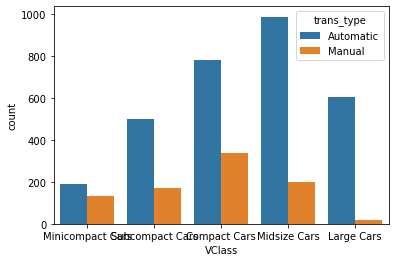

In [27]:
sb.countplot(data=fuel_econ, x='VClass', hue='trans_type');

### Alternative Approach
- Alternative way of depicting the relationship between two categorical variables is through a heat map
- We've seen them work as the 2-D version of a histogram, here we're are using them as the 2-D version of a bar chart
- The seaborn function [heatmap()]() is at home with this type of heat map implementation but the input arguments are unlike most of the visualization functions that have been introduced.
- Instead of providing the original data frame we need to summarize the counts into a matrix that will then be plotted.

#### Get the data into a desirable format - Data Frame
- Use `groupby()` and `size()` to get the number of cars and each combinationof the two variable levels as a pandas series
- Use `Series.reset_index()` to convert a Series into a dataframe object
- Use `Dataframe.pivot()` to rearrange the data to have vehivle class on rows

In [28]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [29]:
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [30]:
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


### Plot the heatmap

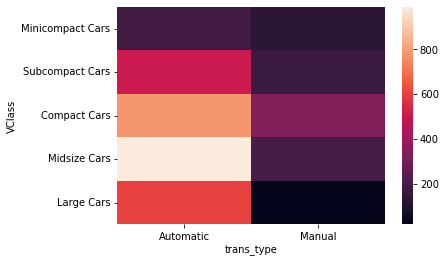

In [31]:
sb.heatmap(ct_counts);

- The heatmap tells the same story as the clustered bar chart

### Additional Variation
- `annot=True` makes it so annotations show up in each cell, but thed efault string formatting only goes to two digits of precision
- Adding `fmt='d'` means that annotations will all be formatted as integers instead
- You can use `fmt = '.0f'` if you have any cells with no counts, in order to account for NaNs.

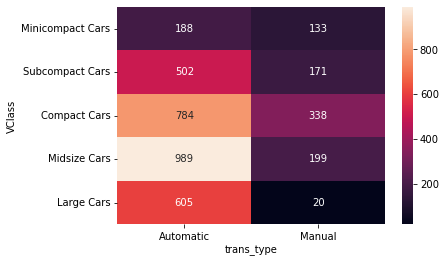

In [32]:
sb.heatmap(ct_counts, annot=True, fmt='d');

## Quiz
- Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class
- Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.)

**NOTE**: &nbsp; The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

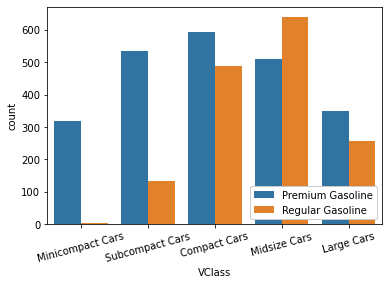

In [33]:
def categorical_solution_1():
    # data setup
    fuel_econ = pd.read_csv('./data/fuel-econ.csv')
    sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21):  # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
    else:  # pre-v0.21
        fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered=True, categories=sedan_classes)
    fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

    # plotting
    ax = sb.countplot(data=fuel_econ_sub, x='VClass', hue='fuelType')
    ax.legend(loc=4, framealpha=1)  # lower right, no transparency
    plt.xticks(rotation=15)


categorical_solution_1()

- A bar chart is preffrered over a heat map in this case since there weren't alotof numbers to plot
- From this plot you can see that alot of numbers use premium gas over regular gas and that the smaller are biased towards the premium gas grade. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.

# Faceting
- One general visualization technique that will be useful for you to know about handling plots of two or more variables is **faceting**
- In faceting the data is subdivided into disjoint subsets, most often by different levels of a categorical variable
- For each of these subsets of the data, the same plot type is rendered on other varaibles
- Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall.

<br/>

- For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels
- Seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) class facilitates the creation of faceted plots
- Steps involved in creating a faceted plot;
    1. create an instance of the FacetGrid object and specify the feature we want to facet by (vehicle class, "VClass" in our example).
    2.  use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, the histogram on combined fuel efficiency "comb").
- In `map` call set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments like `x="combo"` or the mapping wont work properly.

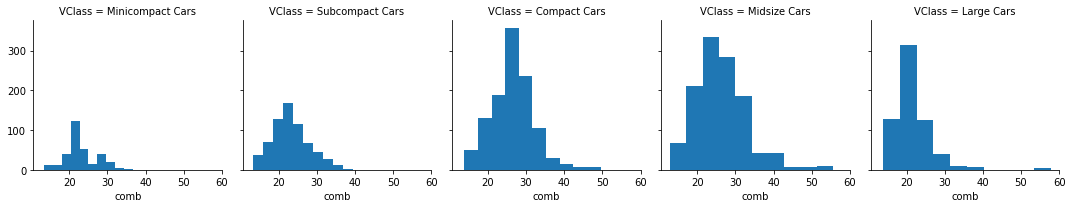

In [34]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars','Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, "comb")

- Each subset of the data is being plotted independently.
- Each uses the default of 10 bins from `hist` to bin together the data and each plot has a different bin size.
- The axis limits on each facet are the same to allow clear and direct comparisons between groups 

- Cleaning things a little bit more by setting the same bin edges on all facets.
- Extra visualization parameters can be set as additional keyword arguments to the `map` function.

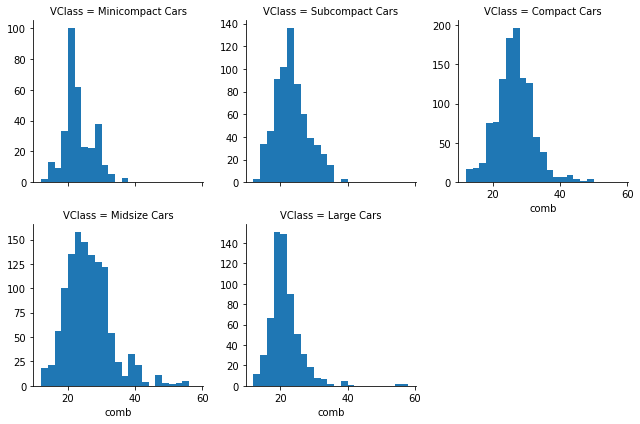

In [35]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins=bin_edges)

### Additional Variation
- If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object's initialization to facilitate clarity in the conveyance of information. 
- The example below includes a categorical variable, "trans", that has 27 different transmission types. Setting col_wrap = 7 means that the plots will be organized into rows of 7 facets each, rather than a single long row of 27 plots.

Also, we want to have the facets for each transmission type in the decreasing order of combined fuel efficiency.

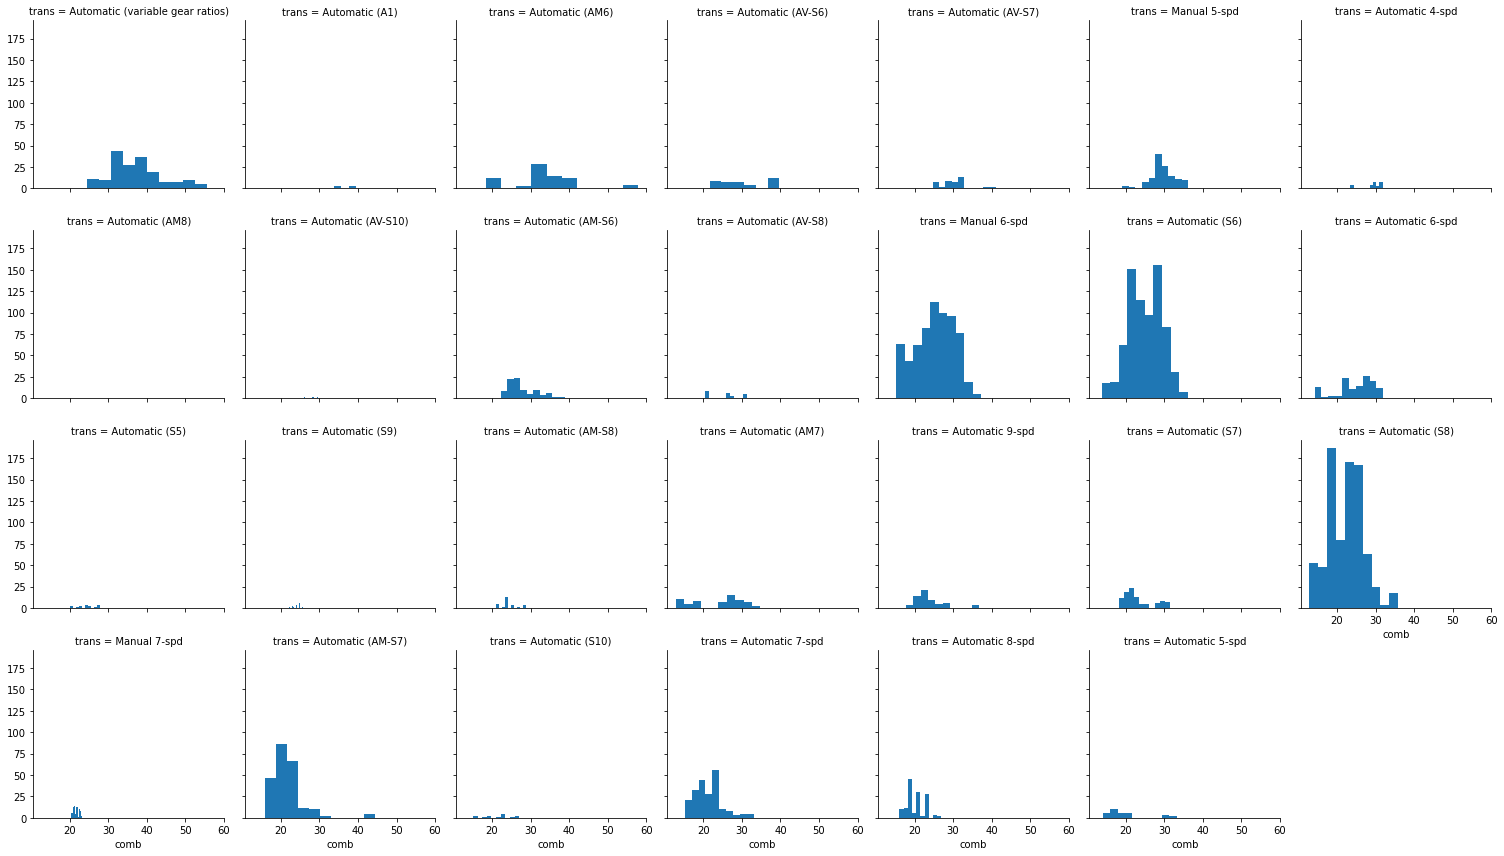

In [36]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending=False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data=fuel_econ, col='trans', col_wrap=7, col_order=group_order)
g.map(plt.hist, 'comb')

In [37]:
fuel_econ.sample(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
2769,37588,Mercedes-Benz,E300 4matic,2017,Midsize Cars,4-Wheel Drive,Automatic 9-spd,Premium Gasoline,4,2.0,...,98,21.7524,27.7000,28.7015,40.900,24.4122,362,5,5,Automatic
797,33796,Audi,S4,2014,Compact Cars,All-Wheel Drive,Automatic (AM-S7),Premium Gasoline,6,3.0,...,90,18.1170,22.4000,27.5580,35.800,21.4190,413,5,5,Automatic
3846,39651,Ford,Mustang Convertible,2018,Subcompact Cars,Rear-Wheel Drive,Automatic (S10),Regular Gasoline,8,5.0,...,0,15.1552,18.7436,23.5794,33.007,18.0585,490,3,3,Automatic


# Adaptations of Univaraite Plots
- Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values
- These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.
- For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

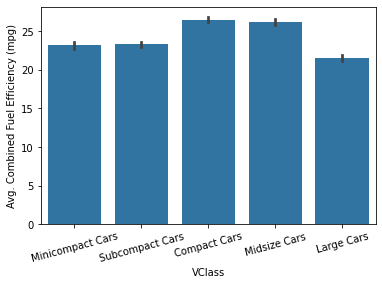

In [38]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

- The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.

<AxesSubplot:xlabel='VClass', ylabel='comb'>

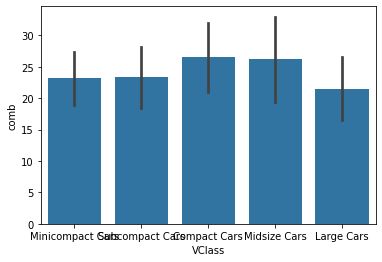

In [39]:
# Try these additional arguments
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')

#### Alternative
- As an alternative the [pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html) function can be used to plot the averages as points rather than as bars
- This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.
- By default `pointplot` will connect values by a line. This is fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via `linestyles = ""` for nominal data

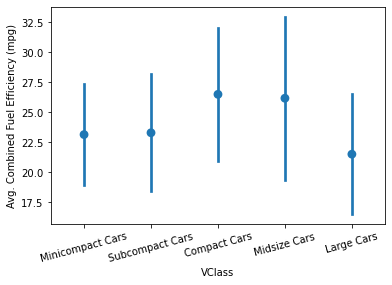

In [40]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb',color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

- The above plots can be useful alternatives to the box plot and violin plot if the data is not conducive to either of those plot types. For example, if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data.

### . Bringing a few charts together

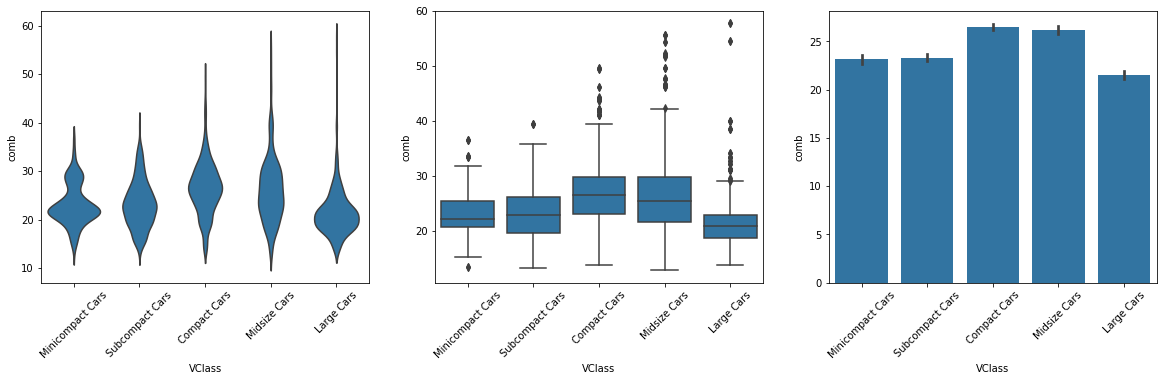

In [41]:
plt.figure(figsize=[20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner=None,color=base_color)
plt.xticks(rotation=45)  # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45)

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=45);

- Matplotlib's `hist()` function can also be adapted so that bar heights indicate value other than a count of points through the use of the "weights" argument.

# Line Plots
- In a line plot we plot the relationship between two quantitative variables, one on each axis using a line
- The Y value of the line at any given X value, reports the average value taken by the y-axis variable
- This is like a histogram with a variable average instead of a count on the y-axis and point positions instead of bar heights.
- The use of lines emphasize two things over bars:
    1. we are more interested in relative change - the need for a zero on the y-axis is not necessary when we create a line plot
    2. line emphasizes connections between values on the x-axis - it's inappropriate to use a line plot if we have a nominal variable on the x-axis
- We frequently see bivariate plots against a time based variable plotted as a line plot. We see this in economic data like stocks or currency charts plotting the enities value across a period of time. In this cases there's usually one measurement per time value, so the line isn't connecting averages, just the raw values across time, but the line still serves an important purpose over an equivalent scatter plot
- It clearly shows the connection between consecutive values and changes over time
- This type of line chart showing values over time is known as a **Time Series Plot**

- The `poinplot` function was good for summarizing a quantitative variable against a qualitative variable. We need a different function for summarizing a quantitative variable against a second quantitative variable
- We will make use of Matplotlib's [errorbar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function which plots a line between points with an optional setting for adding error bars

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

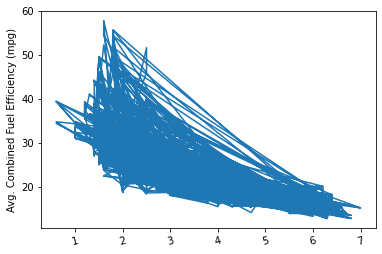

In [42]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

- the plot we get is uninformative (matplotlib is connecting each pair of x and y values in order as they appear in the data frame without any sorting)
- A scatter plot is basically the above plot but without any connecting lines and distinct points at each value pair
- `errorbar()` is fine to use if all our data is sorted by the x-variable and we only have one Y value for each X value
- Do some additional work to get a data frame with those qualities:
    1. set bin edges and centers for summarizing the data on the displacement value (center values are key so that the points are plotted in their accurate positions)
    2. use pandas [cut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function to figure out which bin each data point should be used in (arguments: series being sliced, set of bins, makes sure that values equal to the eman get included into the bins)
    3. use `grouby` to groupby those displacement bins and then take the mean of points that fall in each bin

In [43]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin
bin_edges = np.arange(0.6, 7+0.2, 0.2)
# leaving out the last value of the bin edges, it does not correspond to an actual bin center
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest=True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64, right]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

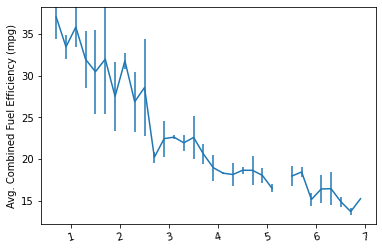

In [44]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
# computing standard deviation of the fuel efficiencies in each bin and plotting them through the Y air parameter
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

- THe line plot is showing a general decrease infuel efficiency with engine size
- There's a gap in the line where there is no data available
- The plot shows while the cars with smaller engine sizes have genearally higher fuel efficiencies there is also alot more varaibility in those efficiencies

### Alternate Variations
- Instead of computing summary statistics on fixed bins, you can also make computations on a rolling window through use of pandas' rolling method

## Quiz
- Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot.

/home/mark/anaconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


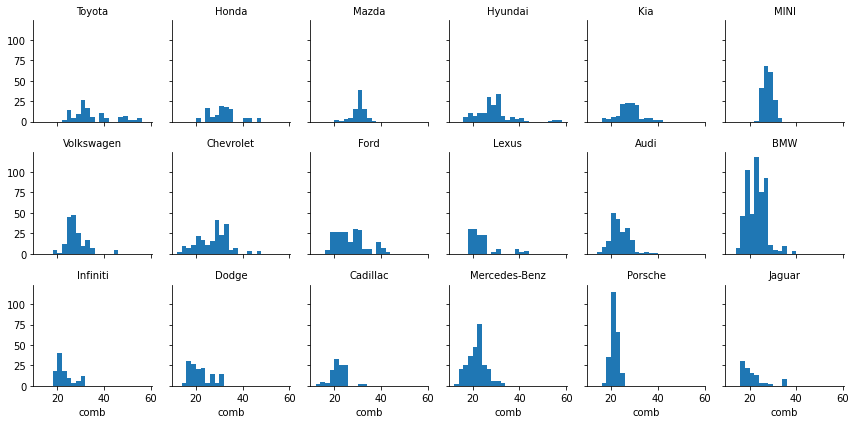

In [47]:
def additionalplot_solution_1():
    # data setup
    fuel_econ = pd.read_csv('./data/fuel-econ.csv')
    THRESHOLD = 80
    make_frequency = fuel_econ['make'].value_counts()
    idx = np.sum(make_frequency > THRESHOLD)
    most_makes = make_frequency.index[:idx]
    fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]
    make_means = fuel_econ_sub.groupby('make').mean()
    comb_order = make_means.sort_values('comb', ascending=False).index
    # plotting
    g = sb.FacetGrid(data=fuel_econ_sub, col='make', col_wrap=6, size=2, col_order=comb_order)
    # try sb.distplot instead of plt.hist to see the plot in terms of density!
    g.map(plt.hist, 'comb', bins=np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
    g.set_titles('{col_name}')


additionalplot_solution_1()

Choice: Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six-column by three-row grid
- One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz.
- One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.

- Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

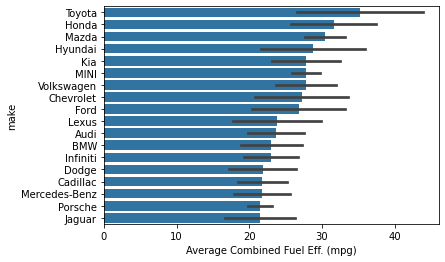

In [50]:
def additionalplot_solution_2():
    # data setup
    fuel_econ = pd.read_csv('./data/fuel-econ.csv')
    THRESHOLD = 80
    make_frequency = fuel_econ['make'].value_counts()
    idx = np.sum(make_frequency > THRESHOLD)
    most_makes = make_frequency.index[:idx]
    fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]
    make_means = fuel_econ_sub.groupby('make').mean()
    comb_order = make_means.sort_values('comb', ascending=False).index
    # plotting
    base_color = sb.color_palette()[0]
    sb.barplot(data=fuel_econ_sub, x='comb', y='make', color=base_color, order=comb_order, ci='sd')
    plt.xlabel('Average Combined Fuel Eff. (mpg)')


additionalplot_solution_2()

- Used horizontal bar charts since there are alot of make levels.
- Error bars have been set to represent the standard deviation of the car mileages.

## Extra
1. Q-Q plots
2. Swarm plots
3. Rug and Strip plots
4. Stacked plots
5. Ridgeline plots